In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 1. Load the datasets
transactions = pd.read_csv('Transactions.csv')
products = pd.read_csv('Products.csv')
customers = pd.read_csv('Customers.csv')


In [4]:
# 2. Create customer feature matrix
# Merge transactions with products to get product details
trans_prod = transactions.merge(products, on='ProductID')
# Create customer purchase behavior matrix
customer_product_matrix = pd.pivot_table(
    trans_prod,
    values='Quantity',
    index='CustomerID',
    columns='ProductID',
    fill_value=0
)


In [5]:
# 3. Normalize the features
scaler = StandardScaler()
scaled_matrix = scaler.fit_transform(customer_product_matrix)


In [6]:
# 4. Calculate similarity scores using cosine similarity
similarity_matrix = cosine_similarity(scaled_matrix)
similarity_df = pd.DataFrame(
    similarity_matrix,
    index=customer_product_matrix.index,
    columns=customer_product_matrix.index
)


In [7]:
# 5. Get top 3 lookalikes for first 20 customers
lookalike_results = []
first_20_customers = customers['CustomerID'][:20]
for customer_id in first_20_customers:
    if customer_id in similarity_df.index:
        # Get similarities excluding the customer itself
        similar_customers = similarity_df[customer_id].drop(customer_id)
        # Get top 3 similar customers
        top_3 = similar_customers.nlargest(3)
        for similar_id, score in top_3.items():
            lookalike_results.append({
                'cust_id': customer_id,
                'lookalike_cust_id': similar_id,
                'similarity_score': round(score, 4)
            })


In [9]:
# 6. Create and save the Lookalike DataFrame
lookalike_df = pd.DataFrame(lookalike_results)
lookalike_df.to_csv('Lookalike.csv', index=False)


In [10]:
# 7. Display results
print("Sample of Lookalike Recommendations:")
print(lookalike_df.head(15))

Sample of Lookalike Recommendations:
   cust_id lookalike_cust_id  similarity_score
0    C0001             C0194            0.4034
1    C0001             C0020            0.3654
2    C0001             C0104            0.3425
3    C0002             C0091            0.4341
4    C0002             C0030            0.4037
5    C0002             C0071            0.3206
6    C0003             C0181            0.4747
7    C0003             C0134            0.4685
8    C0003             C0144            0.4081
9    C0004             C0070            0.3836
10   C0004             C0175            0.3071
11   C0004             C0105            0.2697
12   C0005             C0096            0.4878
13   C0005             C0023            0.4706
14   C0005             C0055            0.3781


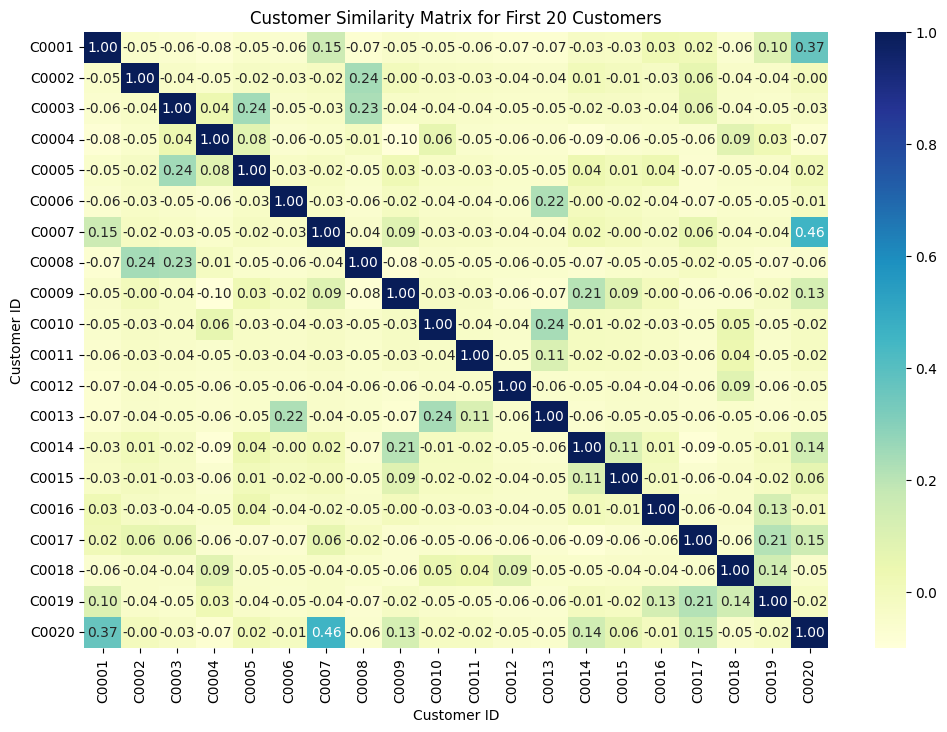

In [15]:
# Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(similarity_df.loc[first_20_customers, first_20_customers], annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Customer Similarity Matrix for First 20 Customers')
plt.xlabel('Customer ID')
plt.ylabel('Customer ID')
plt.show()

In [16]:
print("Top 3 Lookalikes for each of the first 20 customers:")
print(lookalike_df)

Top 3 Lookalikes for each of the first 20 customers:
   cust_id lookalike_cust_id  similarity_score
0    C0001             C0194            0.4034
1    C0001             C0020            0.3654
2    C0001             C0104            0.3425
3    C0002             C0091            0.4341
4    C0002             C0030            0.4037
5    C0002             C0071            0.3206
6    C0003             C0181            0.4747
7    C0003             C0134            0.4685
8    C0003             C0144            0.4081
9    C0004             C0070            0.3836
10   C0004             C0175            0.3071
11   C0004             C0105            0.2697
12   C0005             C0096            0.4878
13   C0005             C0023            0.4706
14   C0005             C0055            0.3781
15   C0006             C0040            0.4572
16   C0006             C0196            0.3842
17   C0006             C0058            0.3754
18   C0007             C0079            0.6176
19   C0